In [1]:
from qiskit import *
from qiskit import IBMQ
IBMQ.save_account('###')
IBMQ.load_account()

/home/rahul/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [2]:
nqbits=3
circuit= QuantumCircuit(nqbits,nqbits)
circuit.h(0)
circuit.cx(0,1)
circuit.cx(1,2)
circuit.measure([0,1,2],[0,1,2])

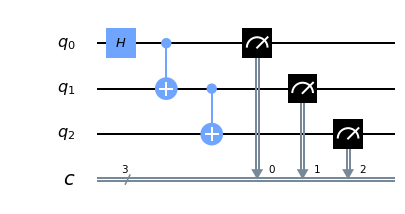

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
circuit.draw(output='mpl')

In [5]:
simulator=Aer.get_backend('qasm_simulator')
sim_result=execute(circuit,backend=simulator,shots=1024).result()

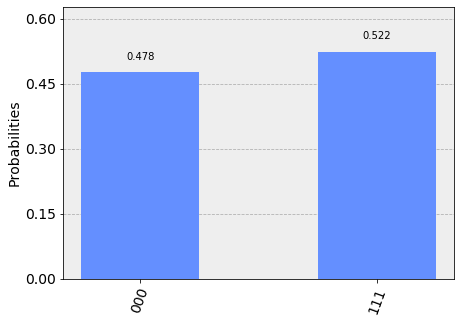

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(sim_result.get_counts(circuit))

In [9]:
provider=IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

In [11]:
job=execute(circuit,backend=device,shots=1024)
print(job.job_id())
from qiskit.tools.monitor import job_monitor
job_monitor(job)

5d8ee60cf8541a00183a3364
Job Status: job has successfully run


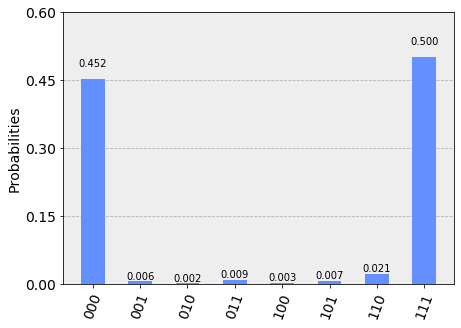

In [12]:
device_result=job.result()
plot_histogram(device_result.get_counts(circuit))

In [13]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal, CompleteMeasFitter)

In [23]:
cal_circuit, state_labels = complete_meas_cal( qr = circuit.qregs[0], circlabel='measerrormitigationcal')

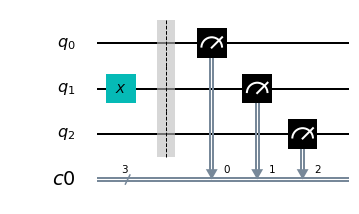

In [24]:
cal_circuit[2].draw(output='mpl')

In [25]:
len(cal_circuit)

8

In [27]:
cal_job=execute(cal_circuit,backend=device,shots=1024,optimization_level=0)
print(cal_job.job_id())
job_monitor(cal_job)
cal_results=cal_job.result()

5d8eea6ccbda66001884e641
Job Status: job has successfully run


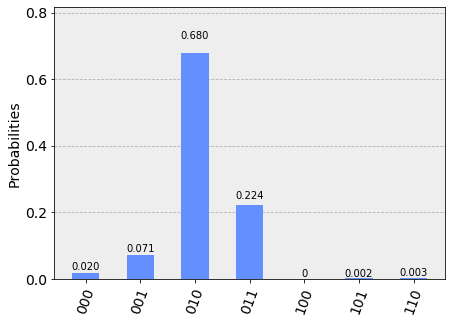

In [29]:
plot_histogram(cal_results.get_counts(cal_circuit[2]))

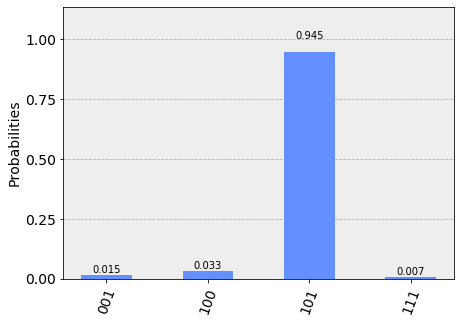

In [30]:
plot_histogram(cal_results.get_counts(cal_circuit[5]))

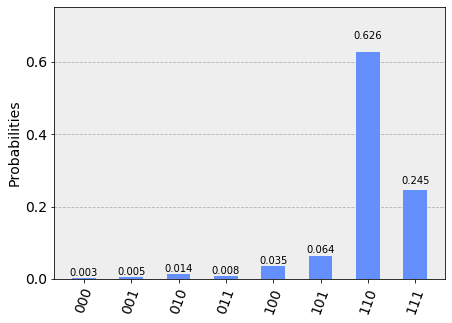

In [31]:
plot_histogram(cal_results.get_counts(cal_circuit[6]))

In [32]:
meas_fitter=CompleteMeasFitter(cal_results,state_labels)

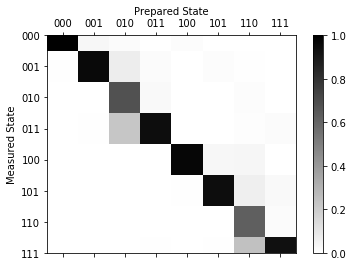

In [33]:
meas_fitter.plot_calibration()

In [35]:
meas_filter=meas_fitter.filter
mitigated_result=meas_filter.apply(device_result)

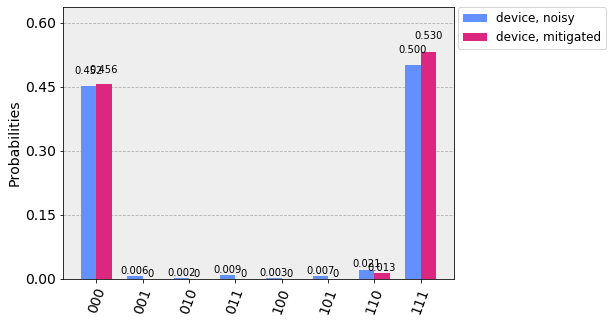

In [36]:
device_counts=device_result.get_counts(circuit)
mitigated_counts=mitigated_result.get_counts(circuit)
plot_histogram([device_counts,mitigated_counts],legend=['device, noisy','device, mitigated'])

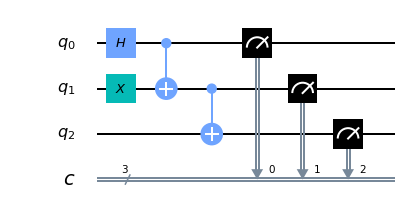

In [39]:
circuit2=QuantumCircuit(3,3) 
circuit2.x(1)
circuit2.h(0)
circuit2.cx(0,1)
circuit2.cx(1,2)
circuit2.measure([0,1,2],[0,1,2])
circuit2.draw(output='mpl')

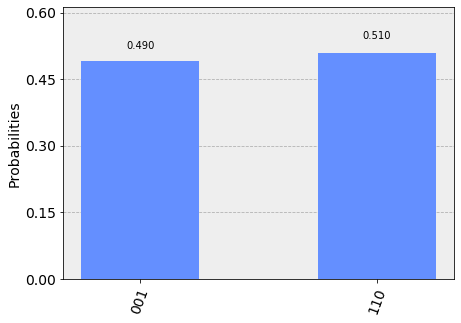

In [42]:
plot_histogram(execute(circuit2,backend=simulator,shots=1024).result().get_counts(circuit2))

In [45]:
device_counts2=execute(circuit2,backend=device,shots=1024).result().get_counts(circuit2)

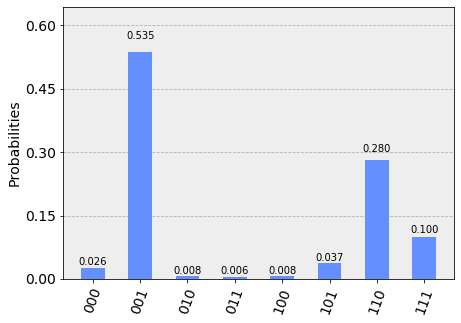

In [46]:
plot_histogram(device_counts2)